In [27]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

In [58]:
# open the file of interest, and use pickle loading
infile = open ("Sample_pt_250_500.pkl",'rb')
new_dict = pickle.load(infile)

# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [59]:
for i in range(10):
    print(new_dict['mass'][i],new_dict['d2'][i])

125.15036485403486 1.2980200835589373
130.55267214662751 1.445626317832899
125.70306309880351 0.986596849742669
126.21585336608149 1.2184665392866647
132.18250371689544 1.2917844364435773
125.67653506886116 0.4343656746345235
127.65400794990293 0.9312049446719695
124.16656852260293 0.9493560863407668
122.13035265114684 3.0022665455324082
125.19144633816678 0.5539996032675585


In [17]:
pt = new_dict['pt']
eta = new_dict['eta']     #used to identify jets. Likely the radial dimension of the cone. see below
phi = new_dict['phi']     #used to identify jets. Likely the azimuthal dimension of cone. see below 
mass = new_dict['mass']
ee2 = new_dict['ee2']     #ee2 and ee3 are energy correlation functions that describe distributions of  
ee3 = new_dict['ee3']     #the energy of particles hard scattered
d2 = new_dict['d2']
angularity = new_dict['angularity']   #can be seen as a measure of QCD radiation around the jet axis, i.e. as the radiation in a one-pronged jet.
t1 = new_dict['t1']
t2 = new_dict['t2']
t3 = new_dict['t3']
t21 = new_dict['t21']
t32 = new_dict['t32']
ktDeltaR = new_dict['KtDeltaR']    #the difference between two cones (delta R) of two subjets within the large R jet

jet is particles inside cone R=(√(Δη)2+Δ(ϕ)2)

In [15]:
eta = new_dict['eta'][1]
phi = new_dict['phi'][1]
print(eta)
print(phi)
R = np.sqrt(eta**2 + phi**2)
R

-1.1704125298734536
0.18881744125909125


1.185545240051348

(0.0, 700.0)

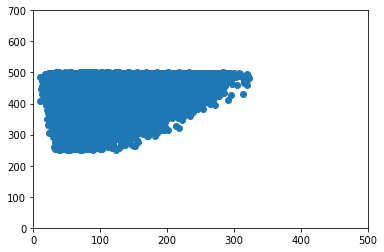

In [39]:
pt = new_dict['pt'][:]
mass = new_dict['mass'][:]
fig,ax = plt.subplots(1,1)
plt.scatter(mass,pt)
plt.xlim([0,500])
plt.ylim(0,700)

In [21]:
new_dict['mass'][:]

0        125.298720
1         88.047054
2         85.794174
3         42.947328
4         59.542227
            ...    
99995     67.399102
99996     90.775772
99997    106.611253
99998     66.278542
99999     62.786390
Name: mass, Length: 100000, dtype: float64

In [42]:
ktDeltaR = new_dict['KtDeltaR'] 

0        0.333731
1        0.477481
2        0.117091
3        0.054606
4        0.095201
           ...   
99995    0.039376
99996    0.321335
99997    0.053165
99998    0.212806
99999    0.175638
Name: KtDeltaR, Length: 100000, dtype: float64

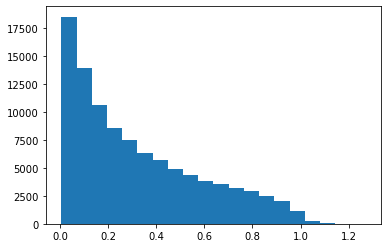

In [53]:
plt.hist(ktDeltaR,bins =20)
plt.show()

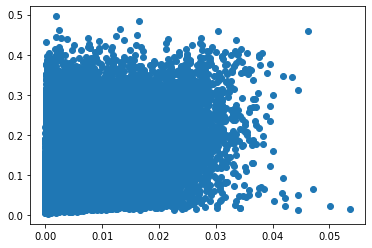

In [46]:
plt.scatter(angularity, ee2)

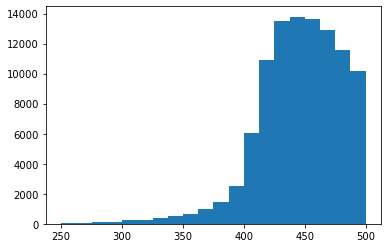

In [54]:
plt.hist(pt,bins=20)
plt.show()

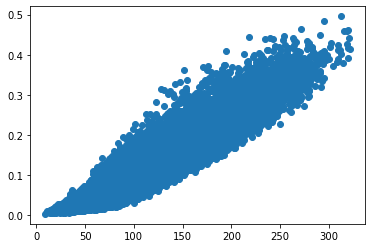

In [55]:
plt.scatter(mass,ee2)

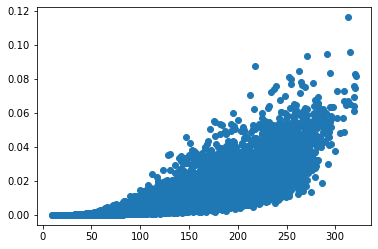

In [56]:
plt.scatter(mass,ee3)